In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:

ACL=pd.read_csv('ACL.csv')
df1=pd.read_csv('data.csv')

C:\Users\alsayed_zahy\AppData\Local\Continuum\anaconda3\envs\life_cycle\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (1,14,15,16,17,18,19,20,23,24,26,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:

h=ACL.query('pcn_priority == "high"')
med=ACL.query('pcn_priority == "moderate"')
low=ACL.query('pcn_priority == "low"')
ACL1=ACL[ACL['PCN'].isnull() == False]
m=np.percentile(ACL1.pcn_time,25)
n=np.percentile(ACL1.pcn_time,75)
b=ACL1.pcn_time.max()
j=ACL1.pcn_time.min()
l=ACL1.query('pcn_time <= @m ')
s=ACL1.query('pcn_time > @m and pcn_time <= @n ')
r=ACL1.query('pcn_time > @n ')
print("Alert Message, You need to take actions for : \n")
print('--------------------------------------------')
print('1- You have {} parts with high priority change \n'.format(len(h)))
print('--------------------------------------------')

print('2- You have {} parts with moderate priority change \n'.format(len(med)))
print('--------------------------------------------')

print('3- You have {} parts with low priority change \n'.format(len(low)))
print('--------------------------------------------')

print('4- You have {} parts with fast change that take place starting in {} days till {} days to be approved \n'.format(len(l),j,m))
print('---------------------------------------------------------------------------')
print('5- You have {} parts with longer change than {} days and take place before {} days \n'.format(len(s),m,n))
print('---------------------------------------------------------------------------')
print('6- You have {} parts with slow change that take place after {} days and till {} days '.format(len(r),n,b))


Alert Message, You need to take actions for : 

--------------------------------------------
1- You have 510 parts with high priority change 

--------------------------------------------
2- You have 379 parts with moderate priority change 

--------------------------------------------
3- You have 203 parts with low priority change 

--------------------------------------------
4- You have 451 parts with fast change that take place starting in 4.0 days till 14.0 days to be approved 

---------------------------------------------------------------------------
5- You have 409 parts with longer change than 14.0 days and take place before 34.0 days 

---------------------------------------------------------------------------
6- You have 232 parts with slow change that take place after 34.0 days and till 44.0 days 


In [4]:
dec=input('If you want to check any list press list No.[1:6] or press [0] to exit')
if dec == str(1) :
    print(h)
elif dec == str(2) :
    print(med)
elif dec == str(3) :
    print(low)
    
elif dec == str(4) :
    print()
elif dec == str(5) :
    print()    
elif dec == str(6) :
    print()
elif dec == str(0):
    pass
else :
    print('Not a Valid choice!')

If you want to check any list press list No.[1:6] or press [0] to exit1
          Taxonomy                       PCN supplier      PN  current  \
6         resistor      Obsolescence_Notices        G   55691       44   
7        capacitor                  Function        J  161307       14   
10            coil                  Function        D  248051       47   
14        resistor                    Recall        H   17631       34   
15       capacitor                  Shipping        C  168477       16   
...            ...                       ...      ...     ...      ...   
1982      touchpad                 Materials        A  955509       45   
1984   USB storage  Datasheet_Specifications        G  815161       15   
1986      touchpad             Wafer_Process        I  931145       15   
1990  power supply                  Shipping        C  351930       24   
1992      touchpad                    Recall        H  959260       75   

      resistance  voltage  size  price 

##### While your first part is :

In [5]:
hh=h[[ 'PCN', 'supplier', 'PN','pcn_eff', 'pcn_priority',
        'pcn_notif', 'pcn_time']]
last=hh.iloc[0:1,:]
last['primitive_solutions']='https://www.siliconexpert.com'
last

<ipython-input-5-b5c04f6e5463>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last['primitive_solutions']='https://www.siliconexpert.com'


PCN supplier     PN                     pcn_eff  \
6  Obsolescence_Notices        G  55691  2021-07-14 13:27:24.537320   

  pcn_priority                   pcn_notif  pcn_time  \
6         high  2021-06-09 13:28:06.710488      34.0   

             primitive_solutions  
6  https://www.siliconexpert.com

#### Primitive Solutions

In [6]:
new=h[['Taxonomy', 'current', 'resistance', 'voltage',
       'size', 'RoHs', 'life_cycle', 'packaging','expected_LC_range','lead_time','inventory','price','supplier','PN']]
new=new.iloc[0:1,:]
cross=pd.DataFrame()
cross=new.sample(50,replace=True)
cross['supplier']=np.random.choice(['A','B','C','U','J'],size=50)
cross['PN']=np.random.choice(np.arange(148,198,1),replace=False,size=50)
cross['inventory']=np.random.choice(np.arange(10010,38000,560),replace=False,size=50)
cross['lead_time']=np.random.choice(np.arange(55,160,2),replace=False,size=50)
cross['price']=np.random.choice(np.arange(33,58,1),size=50)
cross['expected_LC_range']=np.random.choice([1,1.5,3.5,2.5,5.5,6,6.5,7,7.5,8,3,5,4.5,2,2.5],size=50)
cross['life_cycle']=np.random.choice(['Active','NRND','LTB'],p=[.6,.2,.2],size=50)
cross['cross']=np.random.choice(['cross-A'],size=50)
cross=cross.reset_index()
print('We have got {} cross-A parts for first high priority part  :'.format(len(cross)))


We have got 50 cross-A parts for first high priority part  :


C:\Users\alsayed_zahy\AppData\Local\Continuum\anaconda3\envs\life_cycle\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


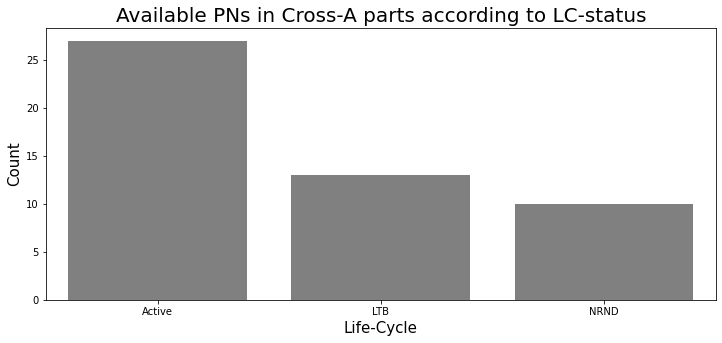

In [7]:
v=cross.life_cycle.value_counts().index
plt.figure(figsize=[12,5]);
sb.countplot(cross.life_cycle,order=v,color='grey');
plt.xlabel('Life-Cycle',size=15);
plt.ylabel('Count',size=15);
plt.title('Available PNs in Cross-A parts according to LC-status',size=20);

In [8]:
act=cross.query('life_cycle == "Active"')
print('We have got {} Active Cross-A parts for you '.format(len(act)))

We have got 27 Active Cross-A parts for you 


###### Supplier Market Distribution for Cross-A parts & investigate line plot for LC_range VS Manufacture

C:\Users\alsayed_zahy\AppData\Local\Continuum\anaconda3\envs\life_cycle\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


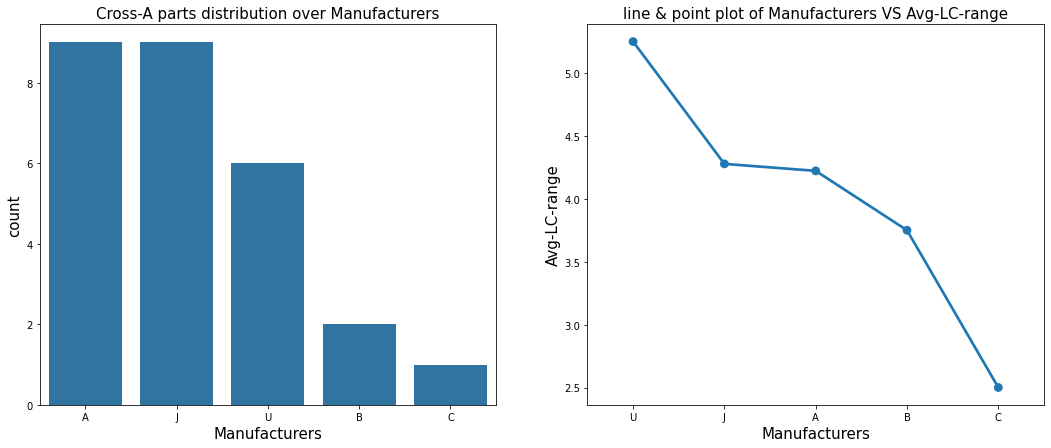

In [9]:
plt.figure(figsize=[18,7]);
plt.subplot(1,2,1);
c=act['supplier'].value_counts()
sb.countplot(act['supplier'],order=c.index,color=sb.color_palette()[0]);
plt.title('Cross-A parts distribution over Manufacturers',size=15);
plt.xlabel('Manufacturers',size=15);
plt.ylabel('count',size=15);

plt.subplot(1,2,2);
avg_lc=act.groupby(['supplier'])['expected_LC_range'].mean()
avg_lc=avg_lc.reset_index(name='avg_LC')
order=act.groupby(['supplier'])['expected_LC_range'].mean().sort_values(ascending = False).index
sb.pointplot(data=avg_lc,x='supplier',y='avg_LC',order=order);
plt.title('line & point plot of Manufacturers VS Avg-LC-range',size=15);
plt.xlabel('Manufacturers',size=15);
plt.ylabel('Avg-LC-range',size=15);


##### Lookslike trouble has alot of solutions as you have 26 cross-A active parts while 6 of them in supplier 'A' and another 6 of them in supplier 'C' but Although supplier "U" has only 5 parts but it also has the biggest record for average expected life-cycle range for them .

###### Investigate Cross-A parts prices

In [10]:
pri=act['price'].sort_values(ascending=False)[-5:].index
s=cross.loc[pri]
print('We have lowest part price detailed below :')
s.iloc[-2:,:]

We have lowest part price detailed below :


index  Taxonomy  current  resistance  voltage  size      RoHs life_cycle  \
27      6  resistor       44          28       48    95  Non RoHs     Active   
34      6  resistor       44          28       48    95  Non RoHs     Active   

   packaging  expected_LC_range  lead_time  inventory  price supplier   PN  \
27      Bulk                6.5        139      29610     34        U  148   
34      Bulk                1.0         87      31850     33        A  152   

      cross  
27  cross-A  
34  cross-A

C:\Users\alsayed_zahy\AppData\Local\Continuum\anaconda3\envs\life_cycle\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


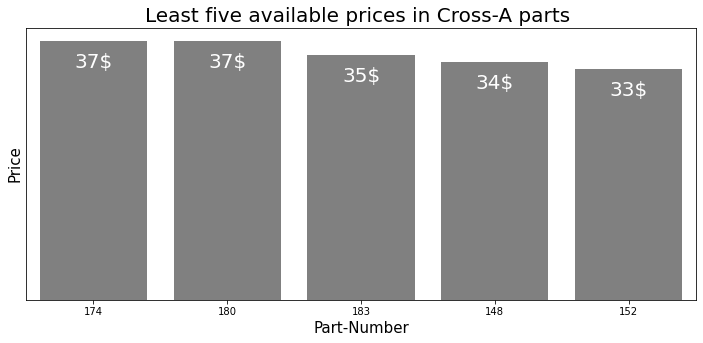

In [11]:
v=s.iloc[0:5,:]
plt.figure(figsize=[12,5]);
sb.barplot(v.PN,v.price,order=v.PN,color='grey');
plt.xlabel('Part-Number',size=15);
plt.ylabel('Price',size=15);
plt.yticks([]);
plt.title('Least five available prices in Cross-A parts ',size=20)
for i,t in enumerate(v.price):
    plt.text(i,t-3,str(t)+'$',va='center',ha='center',size=20,color='white');

###### We will find least part price (PNs "192" & "193" & "168") offerd for "34 USD", While decreases from fifth least part (PN "187" & "182") price by 1 USD as it offerd for "35 USD"

##### Investigate Cross-A data according to Lead-Time 

In [12]:
pri=act['lead_time'].sort_values(ascending=False)[-5:].index
l=cross.loc[pri]
print('We have lowest part lead_time detailed below :')
l.iloc[-1:,:]


We have lowest part lead_time detailed below :


index  Taxonomy  current  resistance  voltage  size      RoHs life_cycle  \
19      6  resistor       44          28       48    95  Non RoHs     Active   

   packaging  expected_LC_range  lead_time  inventory  price supplier   PN  \
19      Bulk                2.5         55      18410     37        U  178   

      cross  
19  cross-A

C:\Users\alsayed_zahy\AppData\Local\Continuum\anaconda3\envs\life_cycle\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


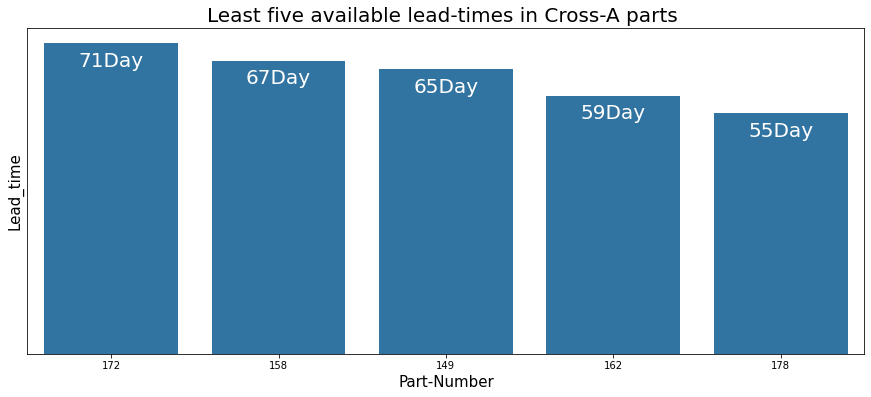

In [13]:
b=l.iloc[0:5,:]
b=b.reset_index()
bb=b['lead_time'].sort_values(ascending=False).index
plt.figure(figsize=[15,6]);
sb.barplot(b.PN,b.lead_time,order=b.PN,color=sb.color_palette()[0]);
plt.xlabel('Part-Number',size=15);
plt.ylabel('Lead_time',size=15);
plt.yticks([]);
plt.title('Least five available lead-times in Cross-A parts ',size=20)
for i,t in enumerate(b.lead_time):
    plt.text(i,t-4,str(t)+'Day',va='center',ha='center',size=20,color='white');

###### We have found least offered lead-time "55 days" for (PN "192"), While decreases from fifth least part (PN "164") lead-time by "18 days" as it offerd for "73 days" lead-time

##### Investigate Cross-A data according to LC-range 

In [14]:
pri=act['expected_LC_range'].sort_values(ascending=True)[-5:].index
l=cross.loc[pri]
print('We have highest expected_LC_range part detailed below :')
l.iloc[-3:,:]


We have highest expected_LC_range part detailed below :


index  Taxonomy  current  resistance  voltage  size      RoHs life_cycle  \
46      6  resistor       44          28       48    95  Non RoHs     Active   
5       6  resistor       44          28       48    95  Non RoHs     Active   
12      6  resistor       44          28       48    95  Non RoHs     Active   

   packaging  expected_LC_range  lead_time  inventory  price supplier   PN  \
46      Bulk                7.5        125      26250     47        U  186   
5       Bulk                7.5        113      11130     35        U  183   
12      Bulk                8.0        121      20650     50        A  169   

      cross  
46  cross-A  
5   cross-A  
12  cross-A

C:\Users\alsayed_zahy\AppData\Local\Continuum\anaconda3\envs\life_cycle\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


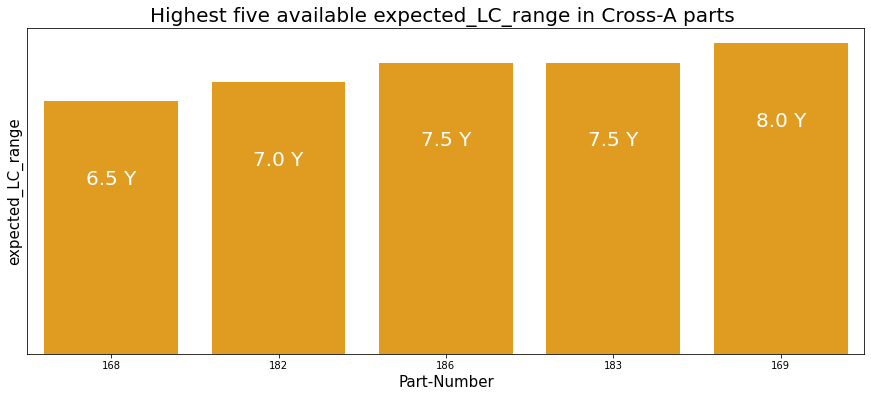

In [15]:
b=l
b=b.reset_index()
plt.figure(figsize=[15,6]);
sb.barplot(b.PN,b.expected_LC_range,order=b.PN,color='orange');
plt.xlabel('Part-Number',size=15);
plt.ylabel('expected_LC_range',size=15);
plt.yticks([]);
plt.title('Highest five available expected_LC_range in Cross-A parts ',size=20)
for i,t in enumerate(b.expected_LC_range):
    plt.text(i,t-2,str(t)+' Y',va='center',ha='center',size=20,color='white');

###### We have found highest offered LC-range "8 years" for (PNs "191" & "150" & "192"), While decreases to  lowest parts (PNs "197" & "164") LC-range by "half year" as they offerd for "7.5 years" LC-range

##### Plotting heatmap for suppliers VS life-cycle counting for Avg-lead-time .

> > Q: What is best offered avg-lead-time related to parts' LC-status within each supplier data? 




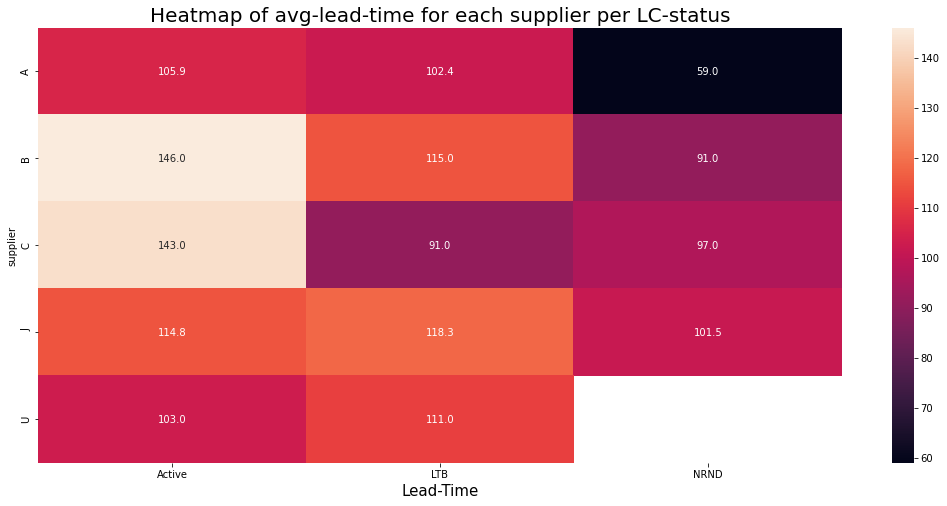

In [16]:
# Drawing Heatmap between supplier-name and LC-status verifying avg-Lead-Time 
plt.figure(figsize=[18,8]);
dr=cross.groupby(['supplier','life_cycle'])['lead_time'].mean()
dr=dr.reset_index(name='Avg_lead_time')
dr=pd.pivot(data=dr,index='supplier',columns='life_cycle',values='Avg_lead_time')
sb.heatmap(dr,annot=True,fmt='0.1f');
plt.title('Heatmap of avg-lead-time for each supplier per LC-status',size=20);
plt.xlabel('Supplier-Name',size=15);
plt.xlabel('Lead-Time',size=15);

###### If you are too much in hurry, least avg-lead-time is for LTB parts within supplier "J" with avg-lead-time of "83 days"

In [ ]:
!jupyter nbconvert report.ipynb --to slides --post serve --no-input --no-prompt